In [1]:
import pandas as pd
import numpy as np
import requests
import re
import seaborn
import matplotlib.pyplot as plt
import tensorflow as tf
#Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
r = requests.get(url, allow_redirects=True)
filename = "raw.csv"
open(filename, 'wb').write(r.content)

4551

In [2]:
#load the dataset into memory
dataset = pd.read_csv('raw.csv', header=None, names=['sepal_length','sepal_width','petal_length','petal_width','species'])
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


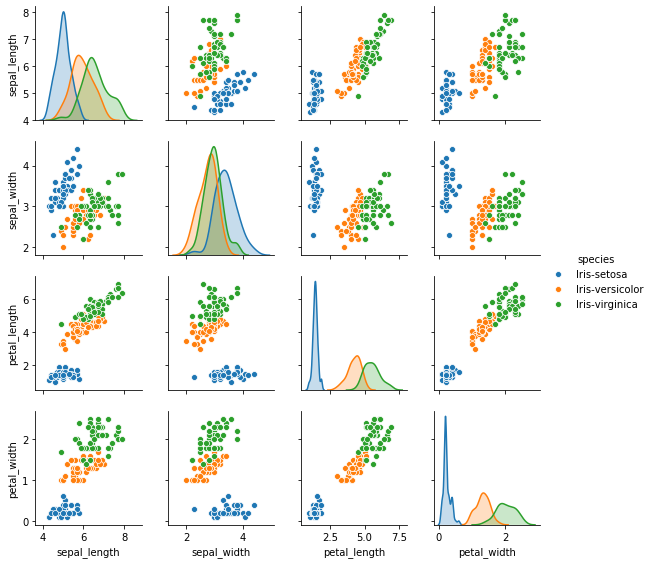

In [3]:
#Plot the dataset
seaborn.pairplot(dataset, hue="species", size=2, diag_kind="kde")
plt.show()

In [4]:
from sklearn.preprocessing import LabelBinarizer
species_lb = LabelBinarizer()
Y = species_lb.fit_transform(dataset.species.values)

In [5]:
from sklearn.preprocessing import normalize
FEATURES = dataset.columns[0:4]
X_data = dataset[FEATURES].as_matrix()
X_data = normalize(X_data)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.3, random_state=1)
X_train.shape

(105, 4)

In [16]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
# Parameters
learning_rate = 0.01
training_epochs = 100

Instructions for updating:
non-resource variables are not supported in the long term


In [17]:
# Neural Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 128 # 1st layer number of neurons
n_input = X_train.shape[1] # input shape (105, 4)
n_classes = y_train.shape[1] # classes to predict

In [18]:
# Inputs
X = tf.placeholder("float", shape=[None, n_input])
y = tf.placeholder("float", shape=[None, n_classes])
# Dictionary of Weights and Biases
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [19]:
    # Model Forward Propagation step
    def forward_propagation(x):
        # Hidden layer1
        layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
        layer_1 = tf.nn.relu(layer_1)
        
        layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
        layer_2 = tf.nn.relu(layer_2)
        # Output fully connected layer
        out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] 
        return out_layer
    # Model Outputs
    yhat = forward_propagation(X)
    ypredict = tf.argmax(yhat, axis=1)

In [20]:
    # Backward propagation
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=yhat))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    #optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [21]:
    # Initializing the variables
    init = tf.global_variables_initializer()
    from datetime import datetime
    startTime = datetime.now()
    with tf.Session() as sess:
        sess.run(init)
        
        #writer.add_graph(sess.graph)
        #EPOCHS
        for epoch in range(training_epochs):
            #Stochasting Gradient Descent
            for i in range(len(X_train)):
                summary = sess.run(train_op, feed_dict={X: X_train[i: i + 1], y: y_train[i: i + 1]})
            
            train_accuracy = np.mean(np.argmax(y_train, axis=1) == sess.run(ypredict, feed_dict={X: X_train, y: y_train}))
            test_accuracy  = np.mean(np.argmax(y_test, axis=1) == sess.run(ypredict, feed_dict={X: X_test, y: y_test}))
                    
            print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
            #print("Epoch = %d, train accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy))
        sess.close()
    print("Time taken:", datetime.now() - startTime)

Epoch = 1, train accuracy = 88.57%, test accuracy = 88.89%
Epoch = 2, train accuracy = 94.29%, test accuracy = 95.56%
Epoch = 3, train accuracy = 88.57%, test accuracy = 73.33%
Epoch = 4, train accuracy = 96.19%, test accuracy = 93.33%
Epoch = 5, train accuracy = 95.24%, test accuracy = 97.78%
Epoch = 6, train accuracy = 92.38%, test accuracy = 95.56%
Epoch = 7, train accuracy = 92.38%, test accuracy = 93.33%
Epoch = 8, train accuracy = 92.38%, test accuracy = 93.33%
Epoch = 9, train accuracy = 92.38%, test accuracy = 95.56%
Epoch = 10, train accuracy = 92.38%, test accuracy = 95.56%
Epoch = 11, train accuracy = 92.38%, test accuracy = 93.33%
Epoch = 12, train accuracy = 92.38%, test accuracy = 95.56%
Epoch = 13, train accuracy = 93.33%, test accuracy = 93.33%
Epoch = 14, train accuracy = 97.14%, test accuracy = 97.78%
Epoch = 15, train accuracy = 97.14%, test accuracy = 97.78%
Epoch = 16, train accuracy = 97.14%, test accuracy = 97.78%
Epoch = 17, train accuracy = 97.14%, test accurac